![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [65]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [66]:
penguins_df = pd.get_dummies(penguins_df, dtype='int') # dtype='int' ensure the output will be 0/1 instead of True/False


In [67]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(penguins_df)
penguins_preprocessed = pd.DataFrame(data=X,columns=penguins_df.columns)
penguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,-0.993994,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,1.006042,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,1.006042,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,1.006042,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,-0.993994,0.993994
5,-0.940642,0.330548,-1.425342,-0.722199,1.006042,-1.006042
6,-0.885538,1.250172,-0.426399,0.581912,-0.993994,0.993994
7,-0.536545,0.228367,-1.353989,-1.250054,1.006042,-1.006042
8,-0.995746,2.067616,-0.711811,-0.504847,-0.993994,0.993994
9,-1.363106,0.330548,-1.139930,-0.629049,1.006042,-1.006042


In [68]:
inertia=[]
for k in range(1,10):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_) #atalet noktası buluyor.
    #ATALET NOKTASI NEDİR?
    #Küme içindeki veri noktalarının merkez noktasına uzaklıklarının toplamıdır.
#Daha düşük değerler daha iyi kümelenmeyi gösterir.
#Ancak kümeler artınca, inertia her zaman düşer! Bu yüzden dirsek noktasını bulmamız gerekir.


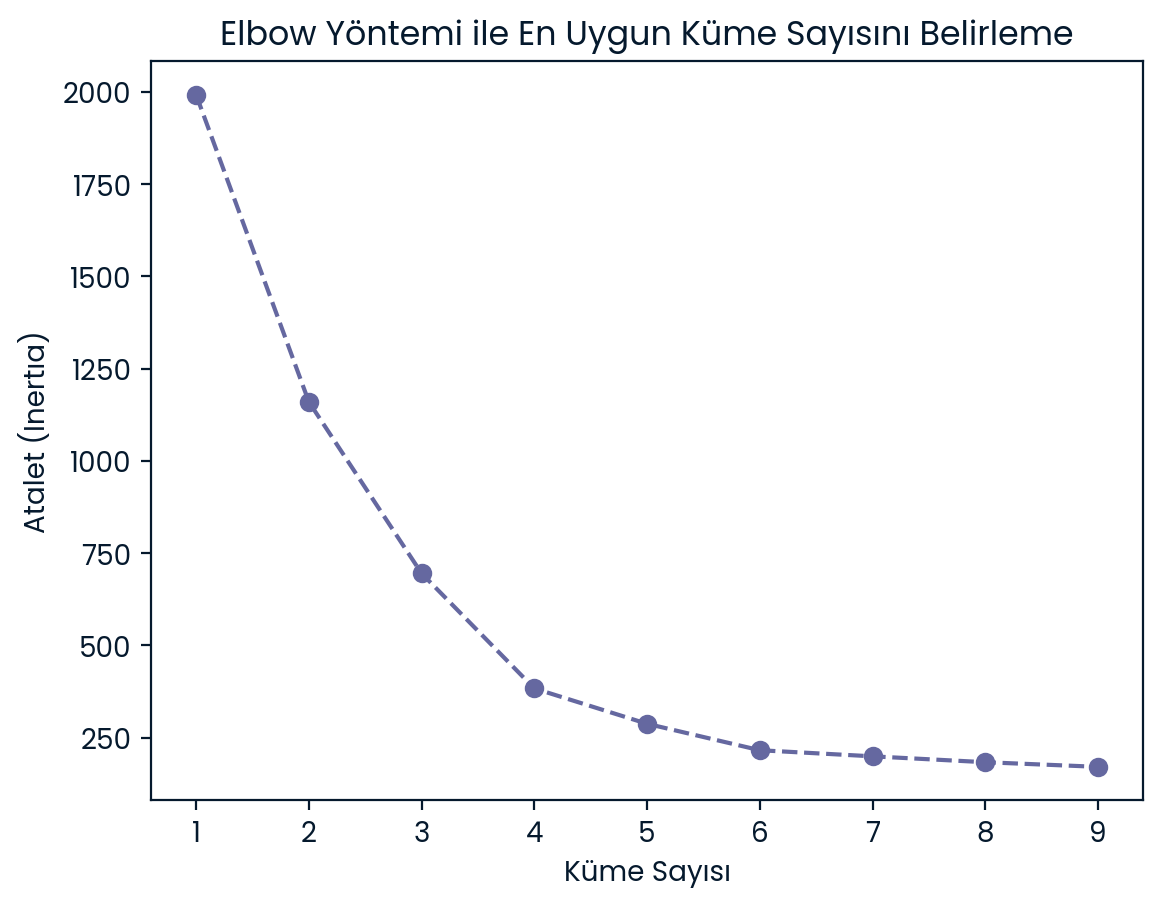

In [69]:
plt.plot(range(1,10),inertia,marker='o',linestyle='--')
plt.xlabel('Küme Sayısı')
plt.ylabel('Atalet (Inertıa)')
plt.title("Elbow Yöntemi ile En Uygun Küme Sayısını Belirleme")
plt.show()

In [70]:
differences = np.diff(inertia)  # 1. türev (inertia değişimi)
second_differences = np.diff(differences) # 2. türev (eğim değişimi)
elbow_point = np.argmin(second_differences) + 2   # En büyük değişim noktası +2 eklenir çünkü türevler eksik eleman oluşturur
print(f"En uygun küme sayısı: {elbow_point}")


En uygun küme sayısı: 7


In [71]:
kmeans=KMeans(n_clusters=7,random_state=42)
kmeans.fit(scaled_data)
penguins_df["label"] = kmeans.labels_


In [72]:
print(penguins_df[["culmen_length_mm", "culmen_depth_mm", "label"]].head())


   culmen_length_mm  culmen_depth_mm  label
0              39.1             18.7      4
1              39.5             17.4      5
2              40.3             18.0      5
3              36.7             19.3      5
4              39.3             20.6      4


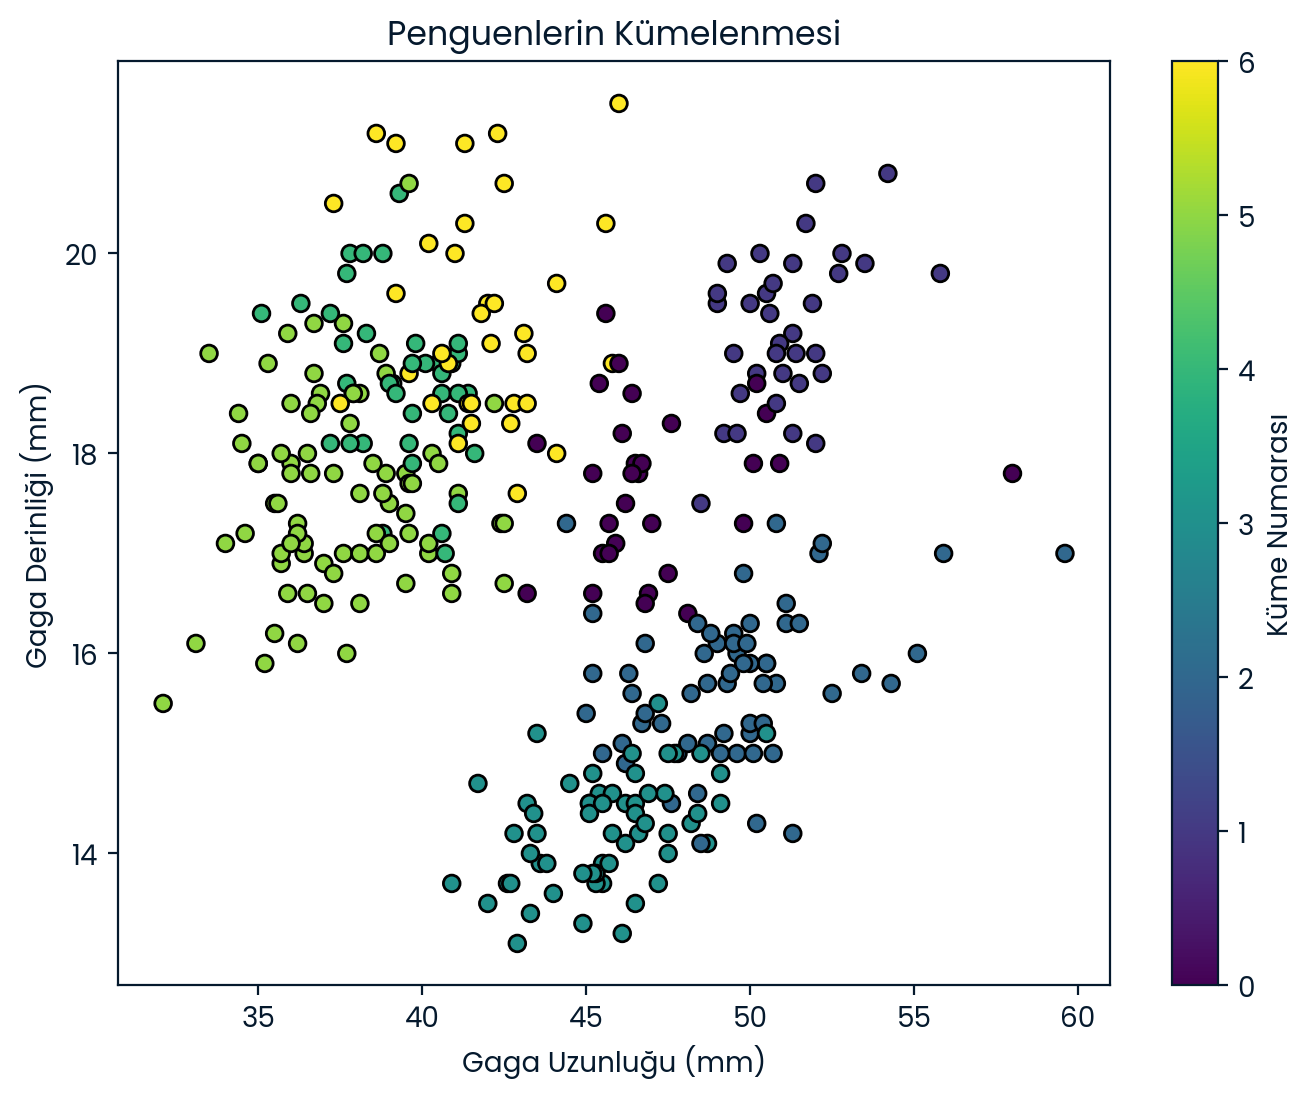

In [73]:
# 📌 Kümeleri renkli olarak çizelim
plt.figure(figsize=(8, 6))
plt.scatter(
    penguins_df["culmen_length_mm"],
    penguins_df["culmen_depth_mm"],
    c=penguins_df["label"],  # Küme etiketlerine göre renklendirme
    cmap="viridis",  # Renk haritası
    edgecolors="k"
)

# 📌 Grafik detayları
plt.xlabel("Gaga Uzunluğu (mm)")
plt.ylabel("Gaga Derinliği (mm)")
plt.title("Penguenlerin Kümelenmesi")
plt.colorbar(label="Küme Numarası")  # Küme numaralarını göstermek için
plt.show()


In [74]:
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_df[numeric_columns].groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,47.173333,17.670000,192.566667
1,51.094118,19.252941,199.911765
2,49.473770,15.718033,221.540984
3,45.563793,14.237931,212.706897
4,39.344737,18.718421,187.921053
5,37.507792,17.588312,187.675325
6,41.729412,19.408824,197.264706
